## Analysis of Data for Intensity of Light Lab ##

 

### Load basic python modules ###

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### If you entered your data into a spreadsheet ###

We can read it right from the spreadsheet if it is save in excel format.  If you entered data in a google sheet, download it as an excel file and then upload the file to your jupyterhub account.

In [3]:
import pandas as pd

In [4]:
file = 'Intensity-data-template.xlsx'
xtable = pd.read_excel(file) # this stores the data in a table

In [5]:
print(xtable)

   distance (cm)       lux 1       lux 2        lux 3  Unnamed: 4  1000000
0             10  796.178344  477.707006  1114.649682         NaN      NaN
1             20  199.044586  159.235669   119.426752         NaN      NaN
2             30   88.464260  106.157112    88.464260         NaN      NaN
3             40   49.761147   49.761147    49.761147         NaN      NaN
4             50   31.847134   31.847134    19.108280         NaN      NaN
5             60   22.116065   22.116065    30.962491         NaN      NaN
6             70   16.248538   19.498245     9.749123         NaN      NaN
7             80   12.440287   14.928344     7.464172         NaN      NaN
8             90    9.829362    9.829362     9.829362         NaN      NaN
9            100    7.961783    7.961783    11.146497         NaN      NaN


In [6]:
# to convert the table to a matrix
xdat = xtable.as_matrix() # excel data is now stored in a 2D array

In [7]:
# to access the first column of distances
distance = xdat[:,0]
print(distance)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [8]:
lux1 = xdat[:,1]
lux2 = xdat[:,2]
lux3 = xdat[:,3]

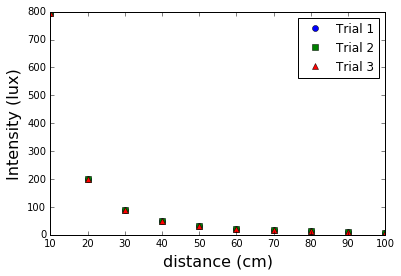

In [9]:
# make a plot
plt.figure()
plt.clf()
plt.plot(distance,lux1,'bo',label='Trial 1')
plt.plot(distance,lux1,'gs',label='Trial 2')
plt.plot(distance,lux1,'r^',label='Trial 3')
plt.legend(numpoints=1)
plt.xlabel('distance (cm)',fontsize=16)
plt.ylabel('Intensity (lux)',fontsize=16)

### If you are entering data by hand ###

In [10]:
# in this cell I am making up data
# you should just create arrays with your measured values
luminosity = 100000. # making up fake data
distance = np.arange(10,100,10)
# true lux
lux = luminosity/(4.*np.pi*distance**2) 
# making up experimental values
lux1 = lux + np.random.uniform(-1.,1.)*lux*.4
lux2 = lux + np.random.uniform(-1.,1.)*lux*.4
lux3 = lux + np.random.uniform(-1.,1.)*lux*.4

In [11]:
# calculate the average of the 3 trials
lux_ave = np.mean([lux1,lux2,lux3],axis=0)
print(lux_ave)

[ 67.04033326  16.76008332   7.44892592   4.19002083   2.68161333
   1.86223148   1.36817007   1.04750521   0.82765844]


In [12]:
# calculate the std among the 3 trials
lux_std = np.std([lux1,lux2,lux3],axis=0)
print(lux_std)

[ 17.25059628   4.31264907   1.91673292   1.07816227   0.69002385
   0.47918323   0.35205299   0.26954057   0.21297032]


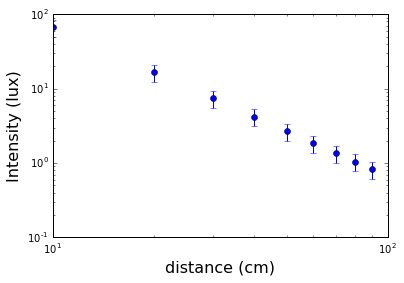

In [13]:
plt.figure()
plt.clf()
plt.plot(distance,lux_ave,'bo')
plt.errorbar(distance,lux_ave,lux_std,fmt=None)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('distance (cm)',fontsize=16)
plt.ylabel('Intensity (lux)',fontsize=16)

## How to fit the power law exponent ##

### Method 1###  
First we will do a simple fit by converting the data into log-log space and then fitting a straight line.

In [14]:
log_distance = np.log10(distance)
log_lux = np.log10(lux1)


[-2.          3.95378388]


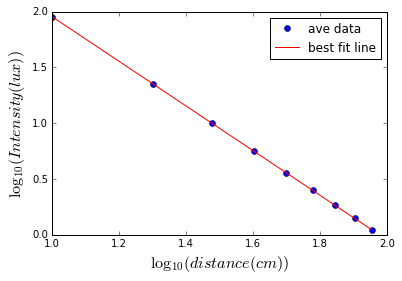

In [15]:
# plot the log_lux vs log_distance
plt.figure()
plt.clf()
plt.plot(log_distance,log_lux,'bo',label='ave data')
plt.xlabel('$ \log_{10}(distance (cm))$',fontsize=16)
plt.ylabel('$ \log_{10}(Intensity (lux))$',fontsize=16)
fig = plt.gca()

c1 = np.polyfit(log_distance,log_lux,1)
print(c1)
xline = np.linspace(min(log_distance),max(log_distance),100)
yline = np.polyval(c1,xline)
plt.plot(xline,yline,'r-',label='best fit line')
plt.legend(numpoints=1)

You should repeat this for each set of trial data.  Then calculate the mean and standard deviation of the power-law exponent that you calculated for each trial.

In [16]:
# test data
tr_1 = np.array([972, 512,336,237,178,139,112])
tr_2 = np.array([950,507,335,240,182,144,117])
tr_3 = np.array([961,510,333,237,180,143,117])
tr_4 = np.array([1015,597,414,306,236,190,157])
tr_5 = np.array([967,575,398,296,229,186,157])
tr_6 = np.array([950,571,399,297,230,186,154])
dist = np.array([32,44.3,54.3,64.3,74.3,84.3,94.3,])

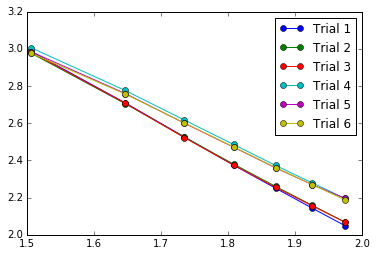

In [20]:
all_fits = np.zeros(6)
plt.figure()
all_trials = [tr_1, tr_2, tr_3,tr_4,tr_5,tr_6]
for i in range(len(all_trials)):
    c = np.polyfit(np.log10(dist),np.log10(all_trials[i]),1)
    all_fits[i]=c[0]
    plt.plot(np.log10(dist),np.log10(all_trials[i]),marker='o',label='Trial '+str(i+1))
    plt.legend()


In [22]:
#print all_fits
ave_power_law = np.mean(all_fits)
std_power_law = np.std(all_fits)
print 'power law = %.2f +/- %.2f'%(ave_power_law,std_power_law)

power law = -1.84 +/- 0.13


### Method 2###

Method 1 does not take our measurement error into account, so we should try something a bit more sophisticated.  We will follow this example of how to fit a power law using the scipy.optimize module.

http://scipy-cookbook.readthedocs.io/items/FittingData.html

In [3]:
# import the curve fitting function from scipy
from scipy.optimize import curve_fit 

We are going to fit a power-law function, which has the form:

$$ y = a x^n $$

In [4]:
# define a function that we are going to use to fit the data
def fitfunction(x,a,n):
    return a*x**n

In [30]:
s,p = curve_fit(fitfunction,distance,lux_ave,sigma=lux_std)
print 'best-fit value of power law = %.1f ' % (s[1])
print 'best-fit value of a = %.1f' %(s[0])
error_estimate = np.sqrt(np.diag(p))
print 'the uncertainty of power law = %.1e' % (error_estimate[1])
print 'the uncertainty of a = %.1e' % (error_estimate[0])

best-fit value of power law = -2.0 
best-fit value of a = 8091.4
the uncertainty of power law = 1.3e-16
the uncertainty of a = 3.8e-12


Note that these errors are crazy small because I am using fake data.

### Method 3 ###

Method 2 has limitations as well, and the details are discussed in a paper by Clauset, Shalizi, and Newman (2009).  Going beyond Method 2 is beyond the scope of this course, but interested readers should see the links below.

https://arxiv.org/pdf/0706.1062v2.pdf

The python version of their code is described here

https://code.google.com/archive/p/agpy/wikis/PowerLaw.wiki
